<a href="https://colab.research.google.com/github/eileenlimjx/DSA4264-Project/blob/main/toxicbert_hate_toxicity_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install Detoxify
from detoxify import Detoxify
import pandas as pd
import numpy as np
import time
import re
import torch

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
rooturl = '/content/drive/My Drive/DSA4264/Data Sample/'
data2223 = pd.read_csv(rooturl+'sample_2223.csv')
data2021 = pd.read_csv(rooturl+'sample_2021.csv')

In [17]:
model = Detoxify('unbiased')

Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.3-alpha/toxic_debiased-c7548aa0.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_debiased-c7548aa0.ckpt
100%|██████████| 476M/476M [00:04<00:00, 106MB/s]
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Full Processing

20/21 data

In [ ]:
chunk_size = 1000
total_rows = len(data2021)
output_file = 'processed_data.csv'

header = True

start = time.time()

with torch.no_grad():
    for start_idx in range(0, total_rows, chunk_size):

        end_idx = min(start_idx + chunk_size, total_rows)
        smolsamp = data2021.iloc[start_idx:end_idx].copy()
        smolsamp['id'] = smolsamp.index
        smolsamp['toxicity'] = 0
        smolsamp['id_att'] = 0

        for i in range(len(smolsamp)):
            text = smolsamp['text'].iloc[i]
            predictions = model.predict([text])

            smolsamp.at[i, 'toxicity'] = 1 if predictions['toxicity'][0] > 0.5 else 0
            smolsamp.at[i, 'id_att'] = 1 if predictions['identity_attack'][0] > 0.5 else 0

        smolsamp.to_csv(output_file, mode='a', header=header, index=False)
        header = False

        print(f"Processed rows {start_idx + 1} to {end_idx}, out of {total_rows}, and appended to '{output_file}'")

end = time.time()
print(f"Total processing time: {end - start:.2f} seconds")

Processed rows 1 to 1000, out of 530674, and appended to 'processed_data.csv'
Processed rows 1001 to 2000, out of 530674, and appended to 'processed_data.csv'
Processed rows 2001 to 3000, out of 530674, and appended to 'processed_data.csv'
Processed rows 3001 to 4000, out of 530674, and appended to 'processed_data.csv'
Processed rows 4001 to 5000, out of 530674, and appended to 'processed_data.csv'
Processed rows 5001 to 6000, out of 530674, and appended to 'processed_data.csv'
Processed rows 6001 to 7000, out of 530674, and appended to 'processed_data.csv'
Processed rows 7001 to 8000, out of 530674, and appended to 'processed_data.csv'
Processed rows 8001 to 9000, out of 530674, and appended to 'processed_data.csv'
Processed rows 9001 to 10000, out of 530674, and appended to 'processed_data.csv'
Processed rows 10001 to 11000, out of 530674, and appended to 'processed_data.csv'
Processed rows 11001 to 12000, out of 530674, and appended to 'processed_data.csv'
Processed rows 12001 to 13

22/23 data

In [ ]:
chunk_size = 1000
total_rows = len(data2223)
output_file = 'processed_data.csv'

header = True

start = time.time()

with torch.no_grad():
    for start_idx in range(0, total_rows, chunk_size):

        end_idx = min(start_idx + chunk_size, total_rows)
        smolsamp = data2021.iloc[start_idx:end_idx].copy()
        smolsamp['id'] = smolsamp.index
        smolsamp['toxicity'] = 0
        smolsamp['id_att'] = 0

        for i in range(len(smolsamp)):
            text = smolsamp['text'].iloc[i]
            predictions = model.predict([text])

            smolsamp.at[i, 'toxicity'] = 1 if predictions['toxicity'][0] > 0.5 else 0
            smolsamp.at[i, 'id_att'] = 1 if predictions['identity_attack'][0] > 0.5 else 0

        smolsamp.to_csv(output_file, mode='a', header=header, index=False)
        header = False

        print(f"Processed rows {start_idx + 1} to {end_idx}, out of {total_rows}, and appended to '{output_file}'")

end = time.time()
print(f"Total processing time: {end - start:.2f} seconds")

### Cleaning up

In [8]:
# reimporting processed data
data2223lynn = pd.read_csv(rooturl+'hatetoxic(lynn)_2223.csv')
data2021lynn = pd.read_csv(rooturl+'hatetoxic(lynn)_2021.csv')

In [32]:
# dropping empty rows and output columns
data2223lynn_cleaned = data2223lynn.dropna(subset=['text']).drop(['toxicity','id_att'], axis=1)
data2021lynn_cleaned = data2021lynn.dropna(subset=['text']).drop(['toxicity','id_att'], axis=1)

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,year,month,subreddit_name,Tokenization,Input IDs
0,actually many condos do not allow overnight pa...,2022-03-16 01:17:27,anyhowack,/r/singapore/comments/tf1kd2/rsingapore_random...,t3_tf1kd2,t1_i0tkv64,0.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,3.0,r/Singapore,"['actually', 'many', 'condo', '##s', 'do', 'no...","[101, 2941, 2116, 25805, 2015, 2079, 2025, 349..."
1,there is no protest in ba sing se,2022-11-30 14:21:39,FluffyThePenguin,/r/singapore/comments/z87ks6/rsingapore_random...,t3_z87ks6,t1_iycu29a,1.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,11.0,r/Singapore,"['there', 'be', 'no', 'protest', 'in', 'ba', '...","[101, 2045, 2003, 2053, 6186, 1999, 8670, 6170..."
2,he has the support of iris koh see her faceboo...,2023-08-30 05:05:39,anisminic,/r/singapore/comments/164fxx4/m_ravi_applied_t...,t3_164fxx4,t3_164fxx4,2.0,t5_2qh8c,"{'banned_at_utc': None, 'mod_reason_by': None,...",2023.0,8.0,r/Singapore,"['he', 'have', 'the', 'support', 'of', 'iris',...","[101, 2002, 2038, 1996, 2490, 1997, 11173, 128..."
3,wp has in their manifesto policies to integrat...,2023-05-13 06:54:47,jypt98,/r/SingaporeRaw/comments/13flwnx/psp_leong_mun...,t3_13flwnx,t3_13flwnx,3.0,t5_xnx04,"{'banned_at_utc': None, 'mod_reason_by': None,...",2023.0,5.0,r/SingaporeRaw,"['wp', 'have', 'in', 'their', 'manifesto', 'po...","[101, 919, 2038, 1999, 2037, 17124, 6043, 2000..."
4,"hello girl, that uncle just friendly reminded ...",2023-09-16 04:59:15,SwordfishWaste5616,/r/singaporehappenings/comments/16jg20s/uncle_...,t3_16jg20s,t3_16jg20s,4.0,t5_70s6ew,"{'banned_at_utc': None, 'mod_reason_by': None,...",2023.0,9.0,r/SingaporeHappenings,"['hello', 'girl', ',', 'that', 'uncle', 'just'...","[101, 7592, 2611, 1010, 2008, 4470, 2074, 5379..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731670,"has not been that for long time, the opiate cr...",2022-09-03 04:43:50,FitCranberry,/r/singapore/comments/x3rs4l/thailand_legalisi...,t3_x3rs4l,t1_imrl91n,366670.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,9.0,r/Singapore,"['have', 'not', 'be', 'that', 'for', 'long', '...","[101, 2038, 2025, 2042, 2008, 2005, 2146, 2051..."
731671,did they ask for their picture to be published?,2022-12-09 09:53:01,Vedor,/r/singapore/comments/zgqsc4/mother_of_fallen_...,t3_zgqsc4,t1_izifc9p,366671.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,12.0,r/Singapore,"['do', 'they', 'ask', 'for', 'their', 'picture...","[101, 2106, 2027, 3198, 2005, 2037, 3861, 2000..."
731672,"id really like to suspend the age limitations,...",2023-02-04 08:05:16,I_Miss_Every_Shot,/r/singapore/comments/10sh7vp/paedophilic_man_...,t3_10sh7vp,t3_10sh7vp,366672.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2023.0,2.0,r/Singapore,"['id', 'really', 'like', 'to', 'suspend', 'the...","[101, 8909, 2428, 2066, 2000, 28324, 1996, 228..."
731673,it is not uncommon for passengers to chat with...,2022-09-14 10:05:56,shiinamachi,/r/singapore/comments/xd1ast/i_had_to_go_home_...,t3_xd1ast,t1_io8pi4t,366673.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,9.0,r/Singapore,"['it', 'be', 'not', 'uncommon', 'for', 'passen...","[101, 2009, 2003, 2025, 13191, 2005, 5467, 200..."


In [44]:
# isolating correct output
blank2223 = data2223lynn[data2223lynn['text'].isnull()][['toxicity','id_att']]
first1k_2223 = data2223lynn.iloc[:1000][['toxicity','id_att']]
output_2223 = pd.concat([first1k_2223, blank2223])
output_2223.reset_index(drop=True, inplace=True)
data2223lynn_cleaned.reset_index(drop=True, inplace=True)
# concatenating to original data
data2223lynn_cleaned_output = pd.concat([data2223lynn_cleaned, output_2223], axis=1)
data2223lynn_cleaned_output

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,year,month,subreddit_name,Tokenization,Input IDs,toxicity,id_att
0,actually many condos do not allow overnight pa...,2022-03-16 01:17:27,anyhowack,/r/singapore/comments/tf1kd2/rsingapore_random...,t3_tf1kd2,t1_i0tkv64,0.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,3.0,r/Singapore,"['actually', 'many', 'condo', '##s', 'do', 'no...","[101, 2941, 2116, 25805, 2015, 2079, 2025, 349...",0.0,0.0
1,there is no protest in ba sing se,2022-11-30 14:21:39,FluffyThePenguin,/r/singapore/comments/z87ks6/rsingapore_random...,t3_z87ks6,t1_iycu29a,1.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,11.0,r/Singapore,"['there', 'be', 'no', 'protest', 'in', 'ba', '...","[101, 2045, 2003, 2053, 6186, 1999, 8670, 6170...",0.0,0.0
2,he has the support of iris koh see her faceboo...,2023-08-30 05:05:39,anisminic,/r/singapore/comments/164fxx4/m_ravi_applied_t...,t3_164fxx4,t3_164fxx4,2.0,t5_2qh8c,"{'banned_at_utc': None, 'mod_reason_by': None,...",2023.0,8.0,r/Singapore,"['he', 'have', 'the', 'support', 'of', 'iris',...","[101, 2002, 2038, 1996, 2490, 1997, 11173, 128...",0.0,0.0
3,wp has in their manifesto policies to integrat...,2023-05-13 06:54:47,jypt98,/r/SingaporeRaw/comments/13flwnx/psp_leong_mun...,t3_13flwnx,t3_13flwnx,3.0,t5_xnx04,"{'banned_at_utc': None, 'mod_reason_by': None,...",2023.0,5.0,r/SingaporeRaw,"['wp', 'have', 'in', 'their', 'manifesto', 'po...","[101, 919, 2038, 1999, 2037, 17124, 6043, 2000...",0.0,0.0
4,"hello girl, that uncle just friendly reminded ...",2023-09-16 04:59:15,SwordfishWaste5616,/r/singaporehappenings/comments/16jg20s/uncle_...,t3_16jg20s,t3_16jg20s,4.0,t5_70s6ew,"{'banned_at_utc': None, 'mod_reason_by': None,...",2023.0,9.0,r/SingaporeHappenings,"['hello', 'girl', ',', 'that', 'uncle', 'just'...","[101, 7592, 2611, 1010, 2008, 4470, 2074, 5379...",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366670,"has not been that for long time, the opiate cr...",2022-09-03 04:43:50,FitCranberry,/r/singapore/comments/x3rs4l/thailand_legalisi...,t3_x3rs4l,t1_imrl91n,366670.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,9.0,r/Singapore,"['have', 'not', 'be', 'that', 'for', 'long', '...","[101, 2038, 2025, 2042, 2008, 2005, 2146, 2051...",0.0,0.0
366671,did they ask for their picture to be published?,2022-12-09 09:53:01,Vedor,/r/singapore/comments/zgqsc4/mother_of_fallen_...,t3_zgqsc4,t1_izifc9p,366671.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,12.0,r/Singapore,"['do', 'they', 'ask', 'for', 'their', 'picture...","[101, 2106, 2027, 3198, 2005, 2037, 3861, 2000...",0.0,0.0
366672,"id really like to suspend the age limitations,...",2023-02-04 08:05:16,I_Miss_Every_Shot,/r/singapore/comments/10sh7vp/paedophilic_man_...,t3_10sh7vp,t3_10sh7vp,366672.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2023.0,2.0,r/Singapore,"['id', 'really', 'like', 'to', 'suspend', 'the...","[101, 8909, 2428, 2066, 2000, 28324, 1996, 228...",0.0,0.0
366673,it is not uncommon for passengers to chat with...,2022-09-14 10:05:56,shiinamachi,/r/singapore/comments/xd1ast/i_had_to_go_home_...,t3_xd1ast,t1_io8pi4t,366673.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022.0,9.0,r/Singapore,"['it', 'be', 'not', 'uncommon', 'for', 'passen...","[101, 2009, 2003, 2025, 13191, 2005, 5467, 200...",0.0,0.0


In [48]:
blank2021 = data2021lynn[data2021lynn['text'].isnull()][['toxicity','id_att']]
first1k_2021 = data2021lynn.iloc[:1000][['toxicity','id_att']]
output_2021 = pd.concat([first1k_2021, blank2021])
output_2021.reset_index(drop=True, inplace=True)
data2021lynn_cleaned.reset_index(drop=True, inplace=True)

data2021lynn_cleaned_output = pd.concat([data2021lynn_cleaned, output_2021], axis=1)
data2021lynn_cleaned_output

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,year,month,subreddit_name,Tokenization,Input IDs,toxicity,id_att
0,lol boss fight,2020-09-03 09:27:01,iamabear1,/r/singapore/comments/ilpvev/5_pap_mps_challen...,t3_ilpvev,t1_g3tp6d9,0.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020.0,9.0,r/Singapore,"['lol', 'boss', 'fight']","[101, 744, 5795, 2954, 102]",0.0,0.0
1,might as well do minecraft. lai dig hole two b...,2020-05-03 04:45:25,SamBellFromSarang,/r/singapore/comments/gcka7v/bmtc_hbl_shellscr...,t3_gcka7v,t3_gcka7v,1.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020.0,5.0,r/Singapore,"['might', 'as', 'well', 'do', 'mine', '##craft...","[101, 2453, 2004, 2092, 2079, 3067, 10419, 101...",0.0,0.0
2,50 loading...,2020-10-01 14:15:27,ataspangsaizua,/r/singapore/comments/j2vsrr/rsingapore_random...,t3_j2vsrr,t1_g79hv36,2.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020.0,10.0,r/Singapore,"['50', 'load', '.', '.', '.']","[101, 2753, 10578, 1012, 1012, 1012, 102]",0.0,0.0
3,?? but there were debatesdialogues in the last...,2020-06-29 11:34:56,rheinl,/r/singapore/comments/hhwxao/why_isnt_there_a_...,t3_hhwxao,t1_fwcqd1n,3.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020.0,6.0,r/Singapore,"['?', '?', 'but', 'there', 'be', 'debate', '##...","[101, 1029, 1029, 2021, 2045, 2020, 14379, 271...",0.0,0.0
4,more than likely she will take home $8k if she...,2020-07-10 13:11:35,skatyboy,/r/singapore/comments/homxdq/singapore_general...,t3_homxdq,t1_fxisapk,4.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020.0,7.0,r/Singapore,"['more', 'than', 'likely', 'she', 'will', 'tak...","[101, 2062, 2084, 3497, 2016, 2097, 2202, 2188...",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530669,anyone saw white chocolate mampm in their near...,2020-12-14 23:38:01,princessapeachz,/r/singapore/comments/kd7n55/rsingapore_random...,t3_kd7n55,t3_kd7n55,530669.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020.0,12.0,r/Singapore,"['anyone', 'see', 'white', 'chocolate', 'mama'...","[101, 3087, 2387, 2317, 7967, 5003, 8737, 2213...",0.0,0.0
530670,"it is not sia but the mandai wildlife group, w...",2021-12-12 23:37:18,kodomodragon,/r/singapore/comments/reqw2p/two_lions_sedated...,t3_reqw2p,t1_ho9k127,530670.0,t5_2qh8c,"{'collapsed_reason_code': None, 'collapsed_rea...",2021.0,12.0,r/Singapore,"['it', 'be', 'not', 'sia', 'but', 'the', 'man'...","[101, 2009, 2003, 2025, 849, 2021, 1996, 2158,...",0.0,0.0
530671,tears that cost less than 20k.,2020-12-13 14:16:42,wocelot1003,/r/singapore/comments/kc7uwd/one_of_dee_koshs_...,t3_kc7uwd,t1_gfojfx1,530671.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020.0,12.0,r/Singapore,"['tear', 'that', 'cost', 'less', 'than', '20',...","[101, 4000, 2008, 3465, 2625, 2084, 2322, 2243...",0.0,0.0
530672,ahhh see.. think its fine the membership fees ...,2020-04-29 11:36:20,Shamalama12345,/r/singapore/comments/ga5pmw/what_are_some_pro...,t3_ga5pmw,t1_foxwo0t,530672.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020.0,4.0,r/Singapore,"['ah', '##hh', 'see', '.', '.', 'think', 'its'...","[101, 6289, 23644, 2156, 1012, 1012, 2228, 204...",0.0,0.0


In [80]:
# exporting correct processed data
data2223lynn_cleaned_output.to_csv(rooturl+'hatetoxic(lynn)_2223.csv')
data2021lynn_cleaned_output.to_csv(rooturl+'hatetoxic(lynn)_2021.csv')

# Visualization

In [50]:
combined_data = pd.concat([data2021lynn_cleaned_output, data2223lynn_cleaned_output], ignore_index=True)
combined_data['year'] = combined_data['year'].astype(int)
combined_data['month'] = combined_data['month'].astype(int)
combined_data

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,year,month,subreddit_name,Tokenization,Input IDs,toxicity,id_att
0,lol boss fight,2020-09-03 09:27:01,iamabear1,/r/singapore/comments/ilpvev/5_pap_mps_challen...,t3_ilpvev,t1_g3tp6d9,0.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,9,r/Singapore,"['lol', 'boss', 'fight']","[101, 744, 5795, 2954, 102]",0.0,0.0
1,might as well do minecraft. lai dig hole two b...,2020-05-03 04:45:25,SamBellFromSarang,/r/singapore/comments/gcka7v/bmtc_hbl_shellscr...,t3_gcka7v,t3_gcka7v,1.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,5,r/Singapore,"['might', 'as', 'well', 'do', 'mine', '##craft...","[101, 2453, 2004, 2092, 2079, 3067, 10419, 101...",0.0,0.0
2,50 loading...,2020-10-01 14:15:27,ataspangsaizua,/r/singapore/comments/j2vsrr/rsingapore_random...,t3_j2vsrr,t1_g79hv36,2.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,10,r/Singapore,"['50', 'load', '.', '.', '.']","[101, 2753, 10578, 1012, 1012, 1012, 102]",0.0,0.0
3,?? but there were debatesdialogues in the last...,2020-06-29 11:34:56,rheinl,/r/singapore/comments/hhwxao/why_isnt_there_a_...,t3_hhwxao,t1_fwcqd1n,3.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,6,r/Singapore,"['?', '?', 'but', 'there', 'be', 'debate', '##...","[101, 1029, 1029, 2021, 2045, 2020, 14379, 271...",0.0,0.0
4,more than likely she will take home $8k if she...,2020-07-10 13:11:35,skatyboy,/r/singapore/comments/homxdq/singapore_general...,t3_homxdq,t1_fxisapk,4.0,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,7,r/Singapore,"['more', 'than', 'likely', 'she', 'will', 'tak...","[101, 2062, 2084, 3497, 2016, 2097, 2202, 2188...",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897344,"has not been that for long time, the opiate cr...",2022-09-03 04:43:50,FitCranberry,/r/singapore/comments/x3rs4l/thailand_legalisi...,t3_x3rs4l,t1_imrl91n,366670.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022,9,r/Singapore,"['have', 'not', 'be', 'that', 'for', 'long', '...","[101, 2038, 2025, 2042, 2008, 2005, 2146, 2051...",0.0,0.0
897345,did they ask for their picture to be published?,2022-12-09 09:53:01,Vedor,/r/singapore/comments/zgqsc4/mother_of_fallen_...,t3_zgqsc4,t1_izifc9p,366671.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022,12,r/Singapore,"['do', 'they', 'ask', 'for', 'their', 'picture...","[101, 2106, 2027, 3198, 2005, 2037, 3861, 2000...",0.0,0.0
897346,"id really like to suspend the age limitations,...",2023-02-04 08:05:16,I_Miss_Every_Shot,/r/singapore/comments/10sh7vp/paedophilic_man_...,t3_10sh7vp,t3_10sh7vp,366672.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2023,2,r/Singapore,"['id', 'really', 'like', 'to', 'suspend', 'the...","[101, 8909, 2428, 2066, 2000, 28324, 1996, 228...",0.0,0.0
897347,it is not uncommon for passengers to chat with...,2022-09-14 10:05:56,shiinamachi,/r/singapore/comments/xd1ast/i_had_to_go_home_...,t3_xd1ast,t1_io8pi4t,366673.0,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022,9,r/Singapore,"['it', 'be', 'not', 'uncommon', 'for', 'passen...","[101, 2009, 2003, 2025, 13191, 2005, 5467, 200...",0.0,0.0


In [58]:
# Group by year and month, and calculate the mean for 'toxicity' and 'hate' to get their proportions
proportion_over_time = combined_data.groupby(['year', 'month'])[['toxicity', 'id_att']].mean().reset_index()

# Rename columns for clarity
proportion_over_time.rename(columns={'toxicity': 'toxicity_percentage', 'id_att': 'hate_percentage'}, inplace=True)
proportion_over_time['toxicity_percentage'] = proportion_over_time['toxicity_percentage'] * 100
proportion_over_time['hate_percentage'] = proportion_over_time['hate_percentage'] * 100

# Display the result
print(proportion_over_time)

    year  month  toxicity_percentage  hate_percentage
0   2020      1             7.468685         0.154063
1   2020      2             7.526233         0.084429
2   2020      3             6.984695         0.126229
3   2020      4             7.600676         0.094802
4   2020      5             7.319515         0.100130
5   2020      6             7.445873         0.134009
6   2020      7             6.350245         0.155483
7   2020      8             6.711162         0.124281
8   2020      9             6.794617         0.070593
9   2020     10             6.733167         0.057891
10  2020     11             6.582710         0.181478
11  2020     12             6.970993         0.113349
12  2021      1             6.273167         0.140759
13  2021      2             7.322277         0.220219
14  2021      3             7.493850         0.137997
15  2021      4             7.038960         0.119788
16  2021      5             7.905469         0.131090
17  2021      6             

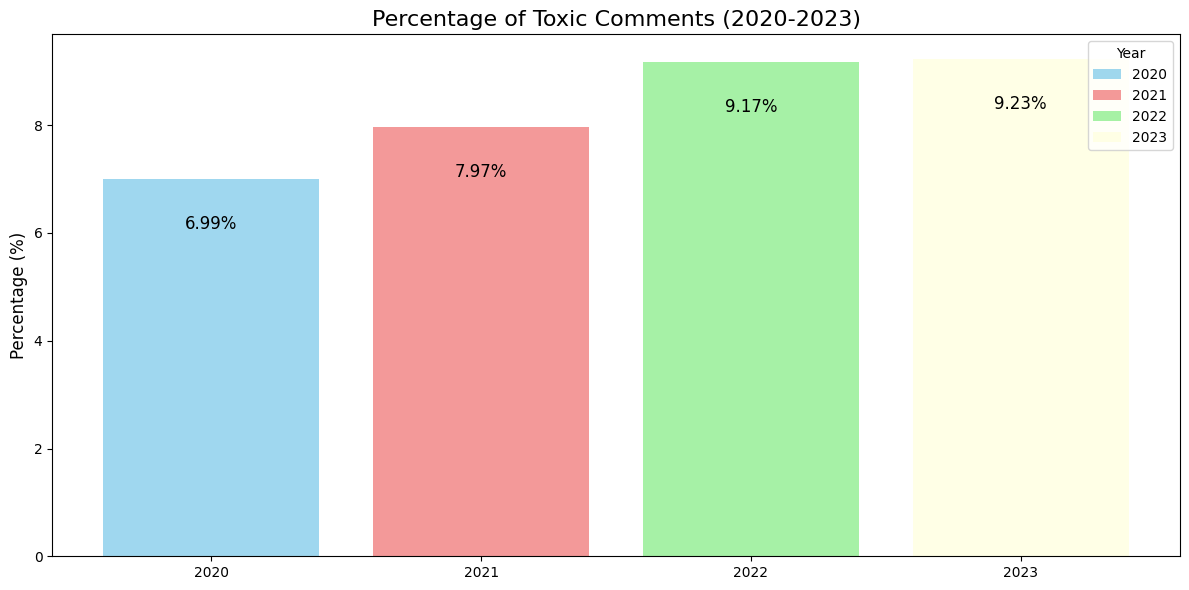

In [66]:
# Group by year and calculate the mean proportion of toxicity and hate for each year
yearly_proportion = combined_data.groupby('year')[['toxicity', 'id_att']].mean().reset_index()

# Rename columns for clarity
yearly_proportion.rename(columns={'toxicity': 'toxicity_proportion', 'id_att': 'hate_proportion'}, inplace=True)
yearly_proportion['toxicity_percentage'] = yearly_proportion['toxicity_proportion'] * 100
yearly_proportion['hate_percentage'] = yearly_proportion['hate_proportion'] * 100

# Plot histograms of yearly toxicity and hate proportions
plt.figure(figsize=(12, 6))

# Plot bars for each year with different colors
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow']
bars = plt.bar(yearly_proportion['year'], yearly_proportion['toxicity_percentage'], color=colors, alpha=0.8, label=yearly_proportion['year'])

# Add text labels on top of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1, f"{yearly_proportion['toxicity_percentage'][i]:.2f}%", ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title("Percentage of Toxic Comments (2020-2023)", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks([2020,2021,2022,2023])

# Legend
plt.legend(title="Year", labels=yearly_proportion['year'], loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()

In [78]:
labels = proportion_over_time['year'].astype(str) + '-' + proportion_over_time['month'].astype(str)
labels[::6]

,0
0,2020-1
6,2020-7
12,2021-1
18,2021-7
24,2022-1
30,2022-7
36,2023-1
42,2023-7


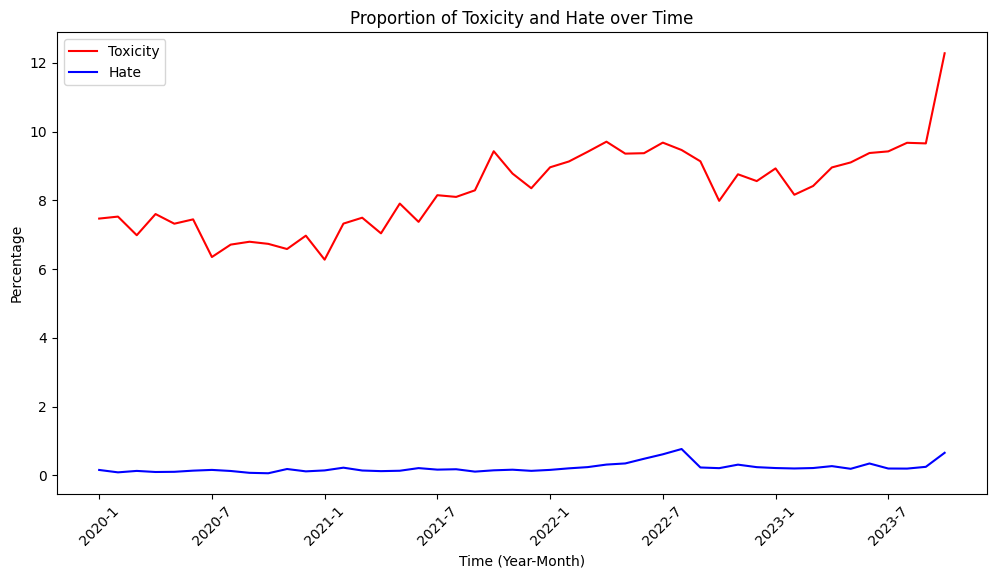

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting toxicity proportion over time
plt.plot(proportion_over_time.index, proportion_over_time['toxicity_percentage'], label='Toxicity', color='r')

# Plotting hate proportion over time
plt.plot(proportion_over_time.index, proportion_over_time['hate_percentage'], label='Hate', color='b')

# Labels and title
plt.xlabel('Time (Year-Month)')
plt.ylabel('Percentage')
plt.title('Proportion of Toxicity and Hate over Time')
plt.legend()
plt.xticks(ticks=range(0, len(proportion_over_time), 6), labels=labels[::6], rotation=45)

plt.show()